<h3>Inicialização</h3>

In [1]:
%matplotlib inline

<h3>Domínio de Frequência - 1D</h3>

C:\Users\william\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


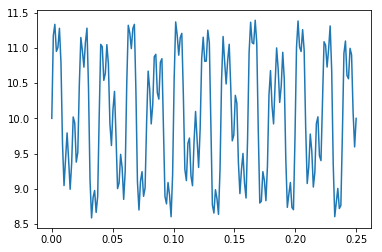

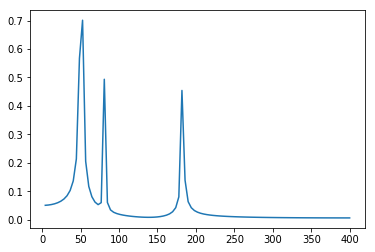

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 200
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x)
y = 10 + np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x) 
y = 10 + np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x) + 0.5*np.sin(180.0 * 2.0*np.pi*x) 
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)


plt.subplot(111)
plt.plot(x, y)
plt.show()
plt.subplot(111)
plt.plot(xf[1:], 2.0/N * np.abs(yf[0:round(N/2)])[1:])
plt.show()

<h3>Domínio de Frequência - 2D</h3>

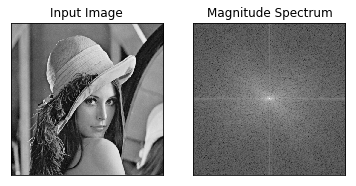

In [8]:
 import cv2
 import numpy as np
 from matplotlib import pyplot as plt

img = cv2.imread('lena512.pgm',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
#one point in the frequency domain -> space domain
import cv2
import numpy as np
from matplotlib import pyplot as plt

# simple averaging filter without scaling parameter
imgf = np.zeros((256,256))
imgf[40,128] = 255
imgf[128,40] = 255 # -> change this

#f_ishift = np.fft.ifftshift(imgf)
img_back = np.fft.ifft2(imgf)
img_back = np.abs(img_back)

plt.subplot(121),plt.imshow(imgf, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])

plt.show()

<h4>Filtro Passa-Alta</h4>

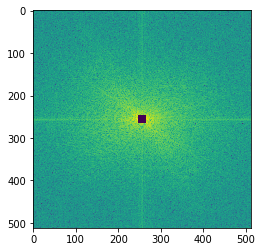

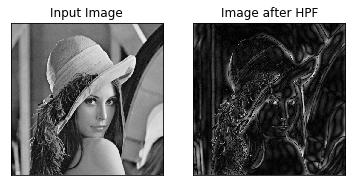

In [35]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2

fshift = np.fft.fftshift(f)
fshift[round(crow)-10:round(crow)+10, round(ccol)-10:round(ccol)+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.imshow(20*np.log(np.abs(fshift) + 1))
plt.show()

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])

plt.show()

<h4>Filtro Passa-Baixa</h4>

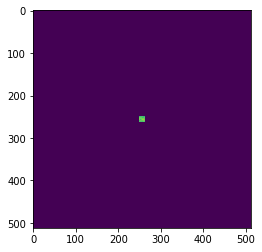

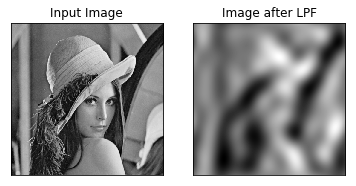

In [38]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2
fshift = np.fft.fftshift(f)
ncut =  250
fshift[0:rows, 0:ncut] = 0
fshift[0:rows, cols-ncut:cols] = 0
fshift[0:ncut, 0:cols] = 0
fshift[rows-ncut:rows, 0:cols] = 0

plt.imshow(20*np.log(np.abs(fshift) + 1))
plt.show()

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])

plt.show()

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

NameError: name 'xrange' is not defined